In [87]:
from os import listdir
from os.path import isfile, join

import json
import re

import pandas as pd

dir_ = 'results'

paths = [f for f in listdir(dir_) if isfile(join(dir_, f)) and f.endswith('.json')]

results = []

for path in paths:
    with open(join(dir_, path)) as f:
        pattern = '(.*?)_(.*?)__(.*?)\.yaml'
        result = re.match(pattern, path)
        version = result.group(1)
        split = result.group(2)
        algorithm = result.group(3)
        result_json = json.load(f)
        for iterations, iteration_val in result_json.items():
            for lr, lr_val in iteration_val.items():
                for batch_sz, batch_sz_val in lr_val.items():
                    results.append({
                        'version': int(version[-1:]),
                        'split': split,
                        'model': algorithm,
                        'iterations': iterations,
                        'learning rate': lr,
                        'batch_sz': batch_sz,
                        'AP50': batch_sz_val['bbox']['AP50']
#                         **batch_sz_val['bbox']
                    })
df = pd.DataFrame.from_records(results)
df

,AP50,batch_sz,iterations,learning rate,model,split,version
0,61.678951,64,3000,0.002,faster_rcnn_R_101_FPN_3x,65,1
1,59.438664,128,3000,0.002,faster_rcnn_R_101_FPN_3x,65,1
2,59.230235,64,3000,0.001,faster_rcnn_R_101_FPN_3x,65,1
3,60.791476,128,3000,0.001,faster_rcnn_R_101_FPN_3x,65,1
4,60.161451,64,3000,0.0005,faster_rcnn_R_101_FPN_3x,65,1
5,59.006560,128,3000,0.0005,faster_rcnn_R_101_FPN_3x,65,1
6,46.088233,128,750,0.002,faster_rcnn_R_101_FPN_3x,65,1
7,44.706504,512,750,0.002,faster_rcnn_R_101_FPN_3x,65,1
8,41.661278,128,750,0.001,faster_rcnn_R_101_FPN_3x,65,1
9,38.002832,512,750,0.001,faster_rcnn_R_101_FPN_3x,65,1


In [88]:
df[df['split'] == '75']

,AP50,batch_sz,iterations,learning rate,model,split,version
50,58.552777,64,3000,0.002,faster_rcnn_R_101_FPN_3x,75,1
51,60.111342,128,3000,0.002,faster_rcnn_R_101_FPN_3x,75,1
52,61.905965,64,3000,0.001,faster_rcnn_R_101_FPN_3x,75,1
53,59.386062,128,3000,0.001,faster_rcnn_R_101_FPN_3x,75,1
54,61.738580,64,3000,0.0005,faster_rcnn_R_101_FPN_3x,75,1
55,61.003587,128,3000,0.0005,faster_rcnn_R_101_FPN_3x,75,1
56,62.501738,64,8000,0.002,faster_rcnn_R_101_FPN_3x,75,1
57,63.573182,128,8000,0.002,faster_rcnn_R_101_FPN_3x,75,1
58,64.017033,64,8000,0.001,faster_rcnn_R_101_FPN_3x,75,1
59,63.004059,128,8000,0.001,faster_rcnn_R_101_FPN_3x,75,1


<Figure size 1080x1080 with 0 Axes>

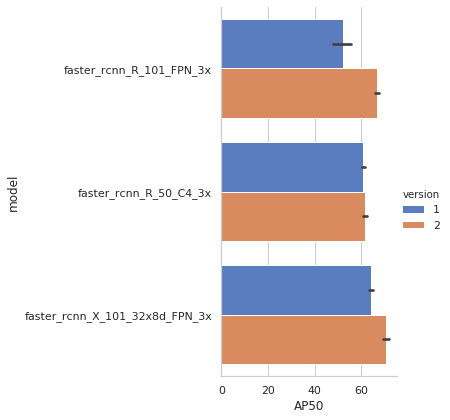

In [89]:
from matplotlib.ticker import PercentFormatter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sns.lmplot('version', 'AP50', data=df, fit_reg=False)
sns.set(style="whitegrid")

plt.figure(figsize=(15, 15))

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="AP50", y="model", hue="version", data=df,
                height=6, kind="bar", palette="muted")

g.savefig("output.png", dpi = 300)
# g.yaxis.set_major_formatter(mtick.PercentFormatter())

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 1080x1080 with 0 Axes>

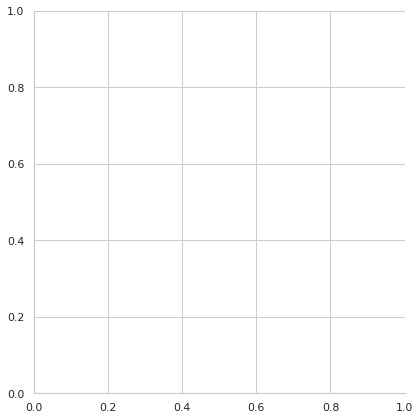

In [44]:
from matplotlib.ticker import PercentFormatter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sns.lmplot('version', 'AP50', data=df, fit_reg=False)
sns.set(style="whitegrid")

plt.figure(figsize=(15, 15))

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="learning rate", y="model", hue="version", data=df,
                height=6, kind="bar", palette="muted")

g.savefig("output.png", dpi = 300)
# g.yaxis.set_major_formatter(mtick.PercentFormatter())

In [90]:
import altair as alt

base = alt.Chart(df).mark_bar().encode(
    x=alt.X('max(AP50):Q'),
    y=alt.Y('version:N', axis=None),
    color='version:N',
    row=alt.Row('model:N', header=alt.Header(labelAngle=0)),
    tooltip=['version', 'max(AP50)', 'model', 'batch_sz', 'learning rate', 'iterations', 'split']
)

# # Configure text
# text = base.mark_text(baseline='middle').encode(
#     text='batch_sz:Q'
# )

# base + text
base

alt.Chart(...)

In [91]:
df[df['AP50'] == df[(df['model'] == 'faster_rcnn_R_101_FPN_3x') & (df['version'] == 1)]['AP50'].max()].append(
    df[df['AP50'] == df[(df['model'] == 'faster_rcnn_R_101_FPN_3x') & (df['version'] == 2)]['AP50'].max()],
    ignore_index=True
)

,AP50,batch_sz,iterations,learning rate,model,split,version
0,65.560239,128,3000,0.001,faster_rcnn_R_101_FPN_3x,85,1
1,70.486936,128,4000,0.001,faster_rcnn_R_101_FPN_3x,65,2


In [94]:
df[df['AP50'] == df[(df['model'] == 'faster_rcnn_R_50_C4_3x') & (df['version'] == 1)]['AP50'].max()].append(
    df[df['AP50'] == df[(df['model'] == 'faster_rcnn_R_50_C4_3x') & (df['version'] == 2)]['AP50'].max()],
    ignore_index=True
)

,AP50,batch_sz,iterations,learning rate,model,split,version
0,63.267088,128,4001,0.001,faster_rcnn_R_50_C4_3x,85,1
1,63.719236,128,4001,0.001,faster_rcnn_R_50_C4_3x,85,2


In [93]:
model = 'faster_rcnn_X_101_32x8d_FPN_3x'
df[df['AP50'] == df[(df['model'] == model) & (df['version'] == 1)]['AP50'].max()].append(
    df[df['AP50'] == df[(df['model'] == model) & (df['version'] == 2)]['AP50'].max()],
    ignore_index=True
)

,AP50,batch_sz,iterations,learning rate,model,split,version
0,65.504241,64,7500,0.0005,faster_rcnn_X_101_32x8d_FPN_3x,65,1
1,72.010179,64,4000,0.0005,faster_rcnn_X_101_32x8d_FPN_3x,65,2
